# Classification Exam

## Importing Libraries

In [57]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn import metrics, preprocessing

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Datasets

In [108]:
T_train = pd.read_csv('train (2).csv')
T_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
T_test = pd.read_csv('test (2).csv')
T_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
T_test['Survived'] = 0
T_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


## Understanding the Data

In [61]:
T_train.shape, T_test.shape

((891, 12), (418, 12))

In [177]:
T = pd.concat([T_train,T_test])
T.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [63]:
T.shape

(1309, 12)

In [64]:
T.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.261268
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.439494
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [65]:
T.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

There is a large amount of Null values in  our data

## Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


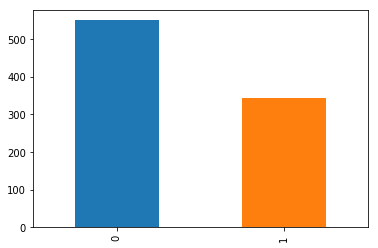

In [72]:
print(T_train["Survived"].value_counts())
print(T_train["Survived"].value_counts(normalize=True))
T_train['Survived'].value_counts().plot.bar()

Less No. of people survived the disaster

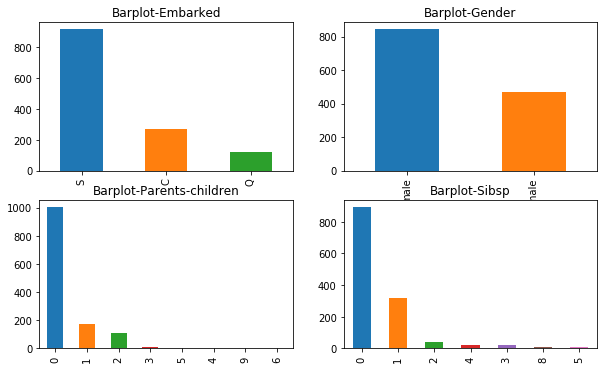

In [78]:
plt.subplot(221)
T["Embarked"].value_counts().plot.bar(figsize=(10,6),title="Barplot-Embarked")

plt.subplot(222)
T["Sex"].value_counts().plot.bar(figsize=(10,6),title="Barplot-Gender")

plt.subplot(223)
T["Parch"].value_counts().plot.bar(figsize=(10,6),title="Barplot-Parents-children")

plt.subplot(224)
T["SibSp"].value_counts().plot.bar(figsize=(10,6),title="Barplot-Sibsp")


1. More no. of passengers have embarked Southampton.
2. No. of males were present in comparison to females
3. People with no children and parents aboard were more 
4. People with no sibling spouse were more in number

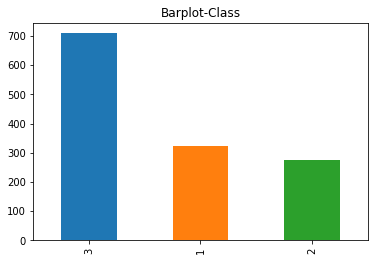

In [93]:
T["Pclass"].value_counts().plot.bar(title="Barplot-Class")

People with class 3 were more in number

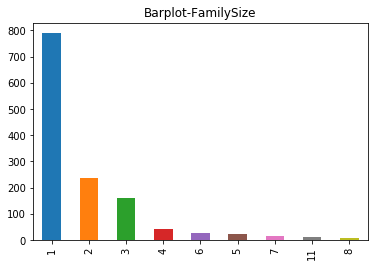

In [178]:
T["Family Size"] = T["Parch"] + T["SibSp"] + 1

T["Family Size"].value_counts().plot.bar(title="Barplot-FamilySize")

Bachelors were more in number on board

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


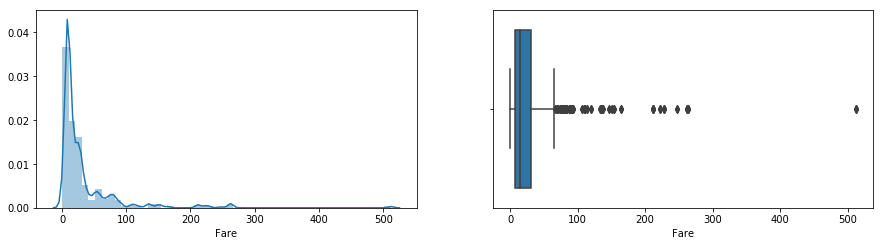

In [81]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(T["Fare"].dropna())

plt.subplot(222)
sns.boxplot(T["Fare"].dropna())

Our data is highly right skewed, there is a large no. of outliers

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


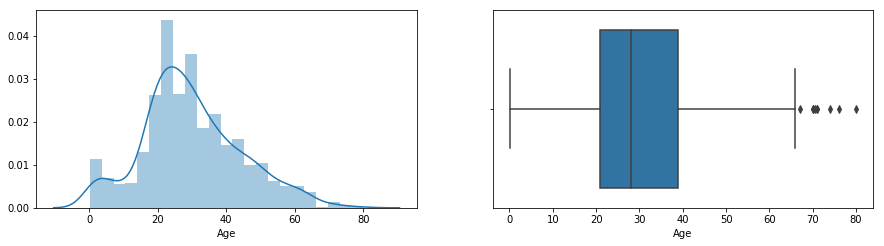

In [82]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(T["Age"].dropna())

plt.subplot(222)
sns.boxplot(T["Age"].dropna())

Our data is not skewed here, but some outliers can be visualized

In [86]:
T['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
F2                 4
F4                 4
B96 B98            4
C22 C26            4
F33                4
D                  4
E101               3
B51 B53 B55        3
E34                3
A34                3
B58 B60            3
C101               3
B35                2
B69                2
B18                2
D30                2
C92                2
F G63              2
C125               2
C32                2
C124               2
B49                2
D37                2
D28                2
C62 C64            2
B77                2
                  ..
C118               1
A18                1
A14                1
B39                1
B79                1
D50                1
C99                1
F E57              1
C30                1
A24                1
C104               1
A9                 1
F E46              1
C110               1
D45                1
C105               1
D47          

In [87]:
T['Ticket'].value_counts()

CA. 2343            11
CA 2144              8
1601                 8
347077               7
S.O.C. 14879         7
PC 17608             7
3101295              7
347082               7
382652               6
19950                6
113781               6
347088               6
4133                 5
349909               5
W./C. 6608           5
16966                5
113503               5
220845               5
PC 17757             5
C.A. 34651           4
C.A. 2315            4
24160                4
SC/Paris 2123        4
W./C. 6607           4
230136               4
PC 17755             4
36928                4
12749                4
17421                4
LINE                 4
                    ..
2626                 1
A/5 21171            1
330979               1
382653               1
680                  1
315082               1
323951               1
349210               1
383162               1
248731               1
12233                1
S.O./P.P. 752        1
2695       

In [179]:
name = T["Name"].str.split(", ",expand=True)
name = name [1].str.split(". ",expand=True)
T["Title"] = name[0]

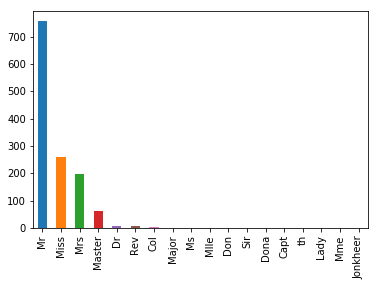

In [180]:
T['Title'].value_counts().plot.bar()

The people bearing the title 'Mr' were more in number

## Bivariate Analysis

In [83]:
T.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

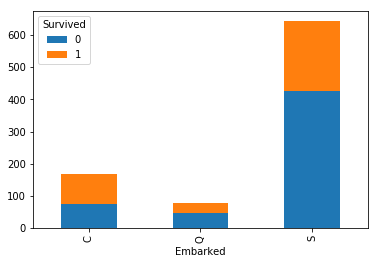

In [85]:
em_survived= pd.crosstab(T_train['Embarked'], T_train['Survived'])
em_survived.plot(kind='bar', stacked=True)

More no. of people survived out of the total people who embarked from Cherbourg.
People from Southampton were the most in number and more than half of them did not survive.

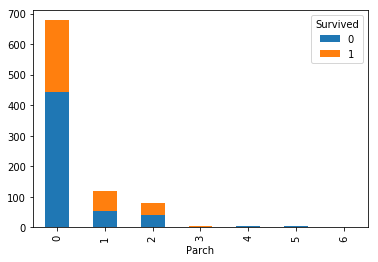

In [89]:
p_survived= pd.crosstab(T_train['Parch'], T_train['Survived'])
p_survived.plot(kind='bar', stacked=True)

Passengers with 1 parent or children survived more in number in their category. Passengers with no parent or children were the most but more than half of them did not survive. 

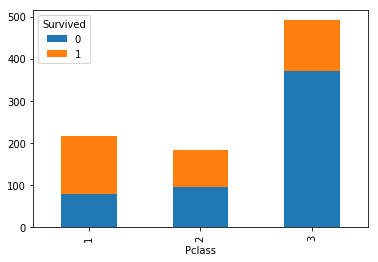

In [94]:
pc_survived= pd.crosstab(T_train['Pclass'], T_train['Survived'])
pc_survived.plot(kind='bar', stacked=True)

Passengers with class 1 had more number of survivers than class 3 which had more number of passengers in the category.

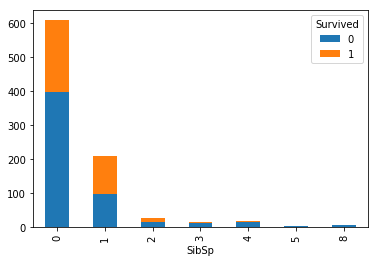

In [95]:
ss_survived= pd.crosstab(T_train['SibSp'], T_train['Survived'])
ss_survived.plot(kind='bar', stacked=True)

Passengers with 1 sibling or spouse survived more in their category, Passenger with no sibling or spouse were the mosy in number but more than half of them did not survive.

In [105]:
name = T_train["Name"].str.split(", ",expand=True)
name = name [1].str.split(". ",expand=True)
T_train["Title"] = name[0]

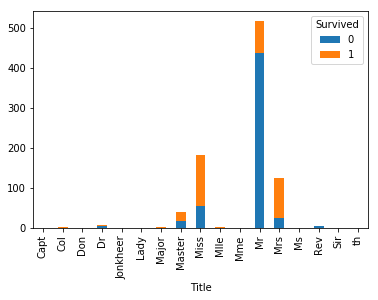

In [106]:
title_survived= pd.crosstab(T_train['Title'], T_train['Survived'])
title_survived.plot(kind='bar', stacked=True)

The passengers bearing titles Miss and Mrs survived the most.

## Missing value Treatment

In [181]:
T.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
Family Size       0
Title             0
dtype: int64

In [182]:
T['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [183]:
T['Embarked'].fillna(value="S",inplace=True)

In [184]:
T.isnull().sum() # we replace missing values with the mode of category embarked, ie, S

Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
Family Size       0
Title             0
dtype: int64

In [185]:
T['Fare'].fillna(value=np.mean(T['Fare']),inplace=True)

In [186]:
T.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
Family Size       0
Title             0
dtype: int64

In [187]:
T['Age'] = T['Age'].fillna(T.groupby(['Title'])['Age'].transform(np.mean))

In [188]:
T.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
Family Size       0
Title             0
dtype: int64

## Outlier Treatment

In [189]:
T.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family Size,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,2,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,2,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,Mr


In [244]:
T1= pd.DataFrame(T)

In [245]:
T1["Fare"]=np.log(T1["Fare"]+1)


In [246]:
T1.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family Size,Title
0,22.0,NaN,S,0.758322,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,Mr
1,38.0,C85,C,0.979843,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,2,Mrs
2,26.0,NaN,S,0.769952,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,Miss
3,35.0,C123,S,0.958431,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,2,Mrs
4,35.0,NaN,S,0.771965,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,Mr


In [247]:
T1.drop(['Cabin','Ticket', 'Title', 'PassengerId', 'Name'], axis=1, inplace=True)
T1.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Family Size
0,22.0,S,0.758322,0,3,male,1,0,2
1,38.0,C,0.979843,0,1,female,1,1,2
2,26.0,S,0.769952,0,3,female,0,1,1
3,35.0,S,0.958431,0,1,female,1,1,2
4,35.0,S,0.771965,0,3,male,0,0,1


In [194]:
T1.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Family Size'],
      dtype='object')

In [248]:
T1 = pd.get_dummies(T1,columns=['Embarked','Pclass','Sex'])
T1.head()

,Age,Fare,Parch,SibSp,Survived,Family Size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,0.758322,0,1,0,2,0,0,1,0,0,1,0,1
1,38.0,0.979843,0,1,1,2,1,0,0,1,0,0,1,0
2,26.0,0.769952,0,0,1,1,0,0,1,0,0,1,1,0
3,35.0,0.958431,0,1,1,2,0,0,1,1,0,0,1,0
4,35.0,0.771965,0,0,0,1,0,0,1,0,0,1,0,1


## Splitting the Data

In [249]:
train_data = T1.iloc[:891, :]
test_data = T1.iloc[891:, :]

In [250]:
train_data.tail()

,Age,Fare,Parch,SibSp,Survived,Family Size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
886,27.000000,0.829305,0,0,0,1,0,0,1,0,1,0,0,1
887,19.000000,0.912001,0,0,1,1,0,0,1,1,0,0,1,0
888,21.774238,0.889652,2,1,0,4,0,0,1,0,0,1,1,0
889,26.000000,0.912001,0,0,1,1,1,0,0,1,0,0,0,1
890,32.000000,0.767063,0,0,0,1,0,1,0,0,0,1,0,1


In [251]:
test_data.columns

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Survived', 'Family Size',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [252]:
X = train_data[['Age','Family Size','Sex_female', 'Sex_male']]
Y = train_data[['Survived']]

model = GaussianNB()
model.fit(X,Y)
expected = train_data['Survived']
Predicted = model.predict(train_data[['Survived']])
print(metrics.classification_report(expected,Predicted))
metrics.confusion_matrix(expected,Predicted)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       549
          1       0.38      1.00      0.55       342

avg / total       0.15      0.38      0.21       891



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0, 549],
       [  0, 342]], dtype=int64)

## Forming the Baseline Model

In [254]:
x_train = train_data.drop(['Survived'],axis=1)
y_train = train_data['Survived']

x_test = test_data.drop(['Survived'],axis=1)
y_test= test_data["Survived"]

In [255]:
# Logistic regression model using GLM
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -387.31
Date:                Thu, 07 Feb 2019   Deviance:                       774.62
Time:                        11:41:07   Pearson chi2:                     927.
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0573      0.422     -0.136      0.892      -0.884       0.769
Age            -0.0426      0.008     -5.415      0.000      -0.058      -0.027
Fare            2.4226      1.208      2.006      0.045       0.056       4.790
Parch           0.0597      0.163      0.366      0.715      -0.260       0.379
SibSp          -0.2045      0.164     -1.250      0.211      -0.525       0.116
Family Size    -0.2021      0.162     -1.246      0.213      -0.520       0.116
Embarked_C      0.1419      0.239      0.593      0.553      -0.327       0.611
Embarked_Q      0.0547      0.272      0.201      0.840      -0.478       0.587
Embarked_S     -0.2539      0.191     -1.330      0.184      -0.628       0.120
Pclass_1        0.9500      0.290      3.273      0.001       0.381       1.519
Pclass_2        0.0650      0.195      0.333      0.739      -0.317       0.447
Pclass_3       -1.0722      0.136     -7.904      0.000      -1.338      -0.806
Sex_female      1.2997      0.245      5.309      0.000       0.820       1.780
Sex_male       -1.3570      0.222     -6.103      0.000      -1.793      -0.921
===============================================================================
"""

In [314]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],(x_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
Age 1.259
Fare 1.467
Parch inf
SibSp inf
Family Size inf
Embarked_C inf
Embarked_Q inf
Embarked_S inf
Pclass_1 inf
Pclass_2 inf
Pclass_3 inf
Sex_female inf
Sex_male inf


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [256]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'Correlation between features')

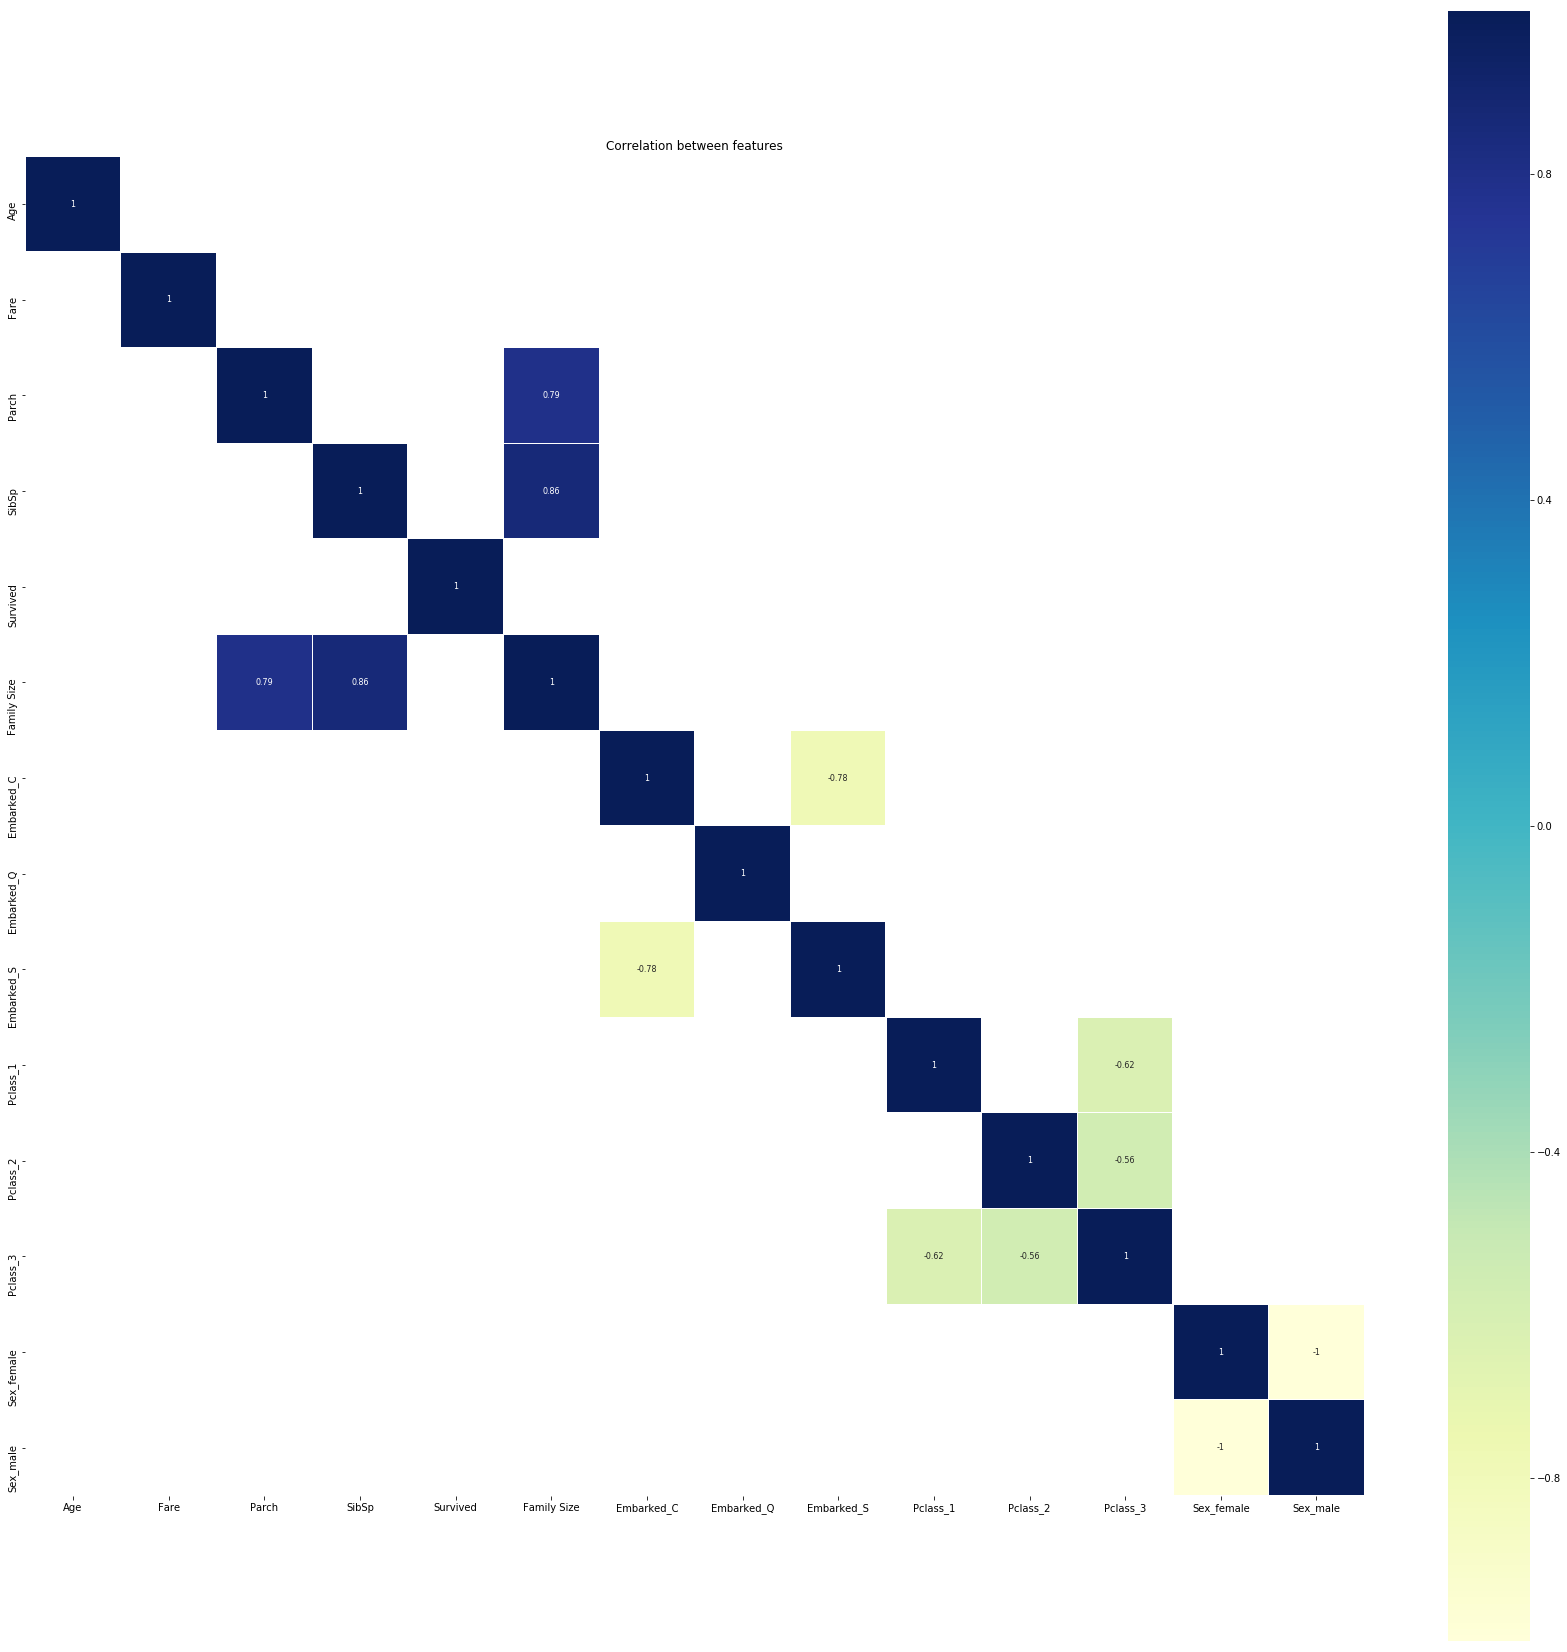

In [257]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=T1.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

In [292]:
x_train = train_data.drop(['Survived'],axis=1)
y_train = train_data['Survived']

x_test = test_data.drop(['Survived'],axis=1)
y_test= test_data["Survived"]

In [315]:
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)
print(metrics.accuracy_score(y_test,pred_lr))
print(metrics.confusion_matrix(y_test,pred_lr))

0.6291866028708134
[[263 155]
 [  0   0]]


In [316]:
rfc = RandomForestClassifier(n_estimators=500, max_features=3)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(print(metrics.confusion_matrix(y_test,pred)))

0.6267942583732058
[[262 156]
 [  0   0]]
None


In [317]:
dtree = DecisionTreeClassifier()
model_dtree = dtree.fit(x_train,y_train)
pred_dtree = model_dtree.predict(x_test)
print(metrics.accuracy_score(y_test, pred_dtree))
print(metrics.confusion_matrix(y_test,pred_dtree))

0.6148325358851675
[[257 161]
 [  0   0]]


In [318]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
print(metrics.accuracy_score(y_test, pred_knn))
print(metrics.confusion_matrix(y_test,pred_knn))

0.638755980861244
[[267 151]
 [  0   0]]


In [263]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [319]:
svm=SVC()
model_svm= svm.fit(x_train, y_train)
pred_svm= model_svm.predict(x_test)
print(metrics.accuracy_score(y_test, pred_svm))
print(metrics.confusion_matrix(y_test,pred_svm))

0.6291866028708134
[[263 155]
 [  0   0]]


In [300]:
x_train1 = train_data.drop(['Survived', 'Sex_female', 'Sex_male' ],axis=1)
y_train1 = train_data['Survived']

x_test1 = test_data.drop(['Survived', 'Sex_female', 'Sex_male'],axis=1)
y_test1= test_data["Survived"]

In [329]:
lr = LogisticRegression()
model_lr = lr.fit(x_train1,y_train1)
pred_lr = model_lr.predict(x_test1)
print(metrics.accuracy_score(y_test1,pred_lr))
print(metrics.confusion_matrix(y_test1,pred_lr))

0.6722488038277512
[[281 137]
 [  0   0]]


In [330]:
rfc = RandomForestClassifier(n_estimators=500, max_features=3)
rfc.fit(x_train1,y_train1)
pred = rfc.predict(x_test1)
print(metrics.accuracy_score(y_test1, pred))
print(metrics.confusion_matrix(y_test1,pred))

0.5717703349282297
[[239 179]
 [  0   0]]


In [331]:
dtree = DecisionTreeClassifier()
model_dtree = dtree.fit(x_train1,y_train1)
pred_dtree = model_dtree.predict(x_test1)
print(metrics.accuracy_score(y_test1, pred_dtree))
print(metrics.confusion_matrix(y_test1,pred_dtree))

0.6052631578947368
[[253 165]
 [  0   0]]


In [332]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_train1,y_train1)
pred_knn = model_knn.predict(x_test1)
print(metrics.accuracy_score(y_test1, pred_knn))
print(metrics.confusion_matrix(y_test1,pred_knn))

0.6435406698564593
[[269 149]
 [  0   0]]


In [335]:
svm=SVC()
model_svm= svm.fit(x_train1, y_train1)
pred_svm= model_svm.predict(x_test1)
print(metrics.accuracy_score(y_test1, pred_svm))
print(metrics.confusion_matrix(y_test1,pred_svm))

0.7511961722488039
[[314 104]
 [  0   0]]


In [337]:
l = []
for model in [lr,rfc,dtree, knn, svm]:
    Scores = cross_val_score(model, x_train1, y_train1, scoring='accuracy', cv=5)
    l.append(Scores.mean())
l

[0.6959601558557437,
 0.7060163764142469,
 0.6621764693574372,
 0.7037689016936386,
 0.7217026321491659]

In [338]:
l = []
for model in [lr,rfc,dtree, knn, svm]:
    Scores = cross_val_score(model, x_train1, y_train1, scoring='accuracy', cv=10)
    l.append(Scores.mean())
l

[0.6982575757575757,
 0.7172857791397117,
 0.6700933492225627,
 0.713914708886619,
 0.7239884803087049]

We get an accuracy of 75% when we use SVM. The model formed is a good model. Other algorithms are giving an underfit model